In [1]:
# homework 5.5 parabolic interpolation
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1(x):
    return (x**3)-(6*(x**2))+(4*x)+12

def f2(x):
    return (x**3)-(4*(x**2))-(6*x)+5

In [3]:
def opt_parabola(x1,x2,x3,op):
    if op == 1:
        fx1 = f1(x1)
        fx2 = f1(x2)
        fx3 = f1(x3)
    elif op == 2:
        fx1 = f2(x1)
        fx2 = f2(x2)
        fx3 = f2(x3)
    #end if
    a1 = (x2-x1)*(x2-x1)*(fx2-fx3)
    a2 = (x2-x3)*(x2-x3)*(fx2-fx1)
    b1 = (x2-x1)*(fx2-fx3)
    b2 = (x2-x3)*(fx2-fx1)
    c = (a1-a2)/(b1-b2)
    x4 = x2-(0.5*c)
    return x4
#end function

In [4]:
def max_parabolic(x1,x2,x3,eps,op):
    xopt_prev = x2
    x4 = opt_parabola(x1,x2,x3,op)
    if op == 1:
        fx1 = f1(x1)
        fx2 = f1(x2)
        fx3 = f1(x3)
        fx4 = f1(x4)
    elif op == 2:
        fx1 = f2(x1)
        fx2 = f2(x2)
        fx3 = f2(x3)
        fx4 = f2(x4)
    #end if
    print('x1 = %4.4f\tx2 = %4.4f\tx3 = %4.4f\tx4 = %4.4f' %(x1,x2,x3,x4))
    print('f(x1) = %4.4f\tf(x2) = %4.4f\tf(x3) = %4.4f\tf(x4) = %4.4f' %(fx1,fx2,fx3,fx4))
    if x4 > x2:
        if fx4 > fx2:
            #interval [x1,x2] will be eliminated. x3 remains the same.
            xmax = x4
            x1 = x2
            x2 = x4
        else: #f(x4) < f(x2)
            # interval [x4,x3] will be eliminated. x1 and x2 remain the same.
            xmax = x2
            x3 = x4
        #end if
    else: # x4 < x2 (x4 is on the left of x2)
        if fx4 > fx2:
            # interval [x2,x3] will be eliminated
            xmax = x4
            x3 = x2
            x2 = x4
        else: # f(x4) < f(x2)
            # region [x1,x4] will be elminated, x2 and x3 remain the same
            xmax = x2
            x1 = x4
        # end if
    #end if
    xopt = xmax
    epa = np.abs((xopt-xopt_prev)/xopt)*100
    print('xopt = %4.4f\tepa = %4.4f' %(xopt,epa))
    if epa < eps:
        return xopt
    else:
        return max_parabolic(x1,x2,x3,eps,op)

In [5]:
def min_parabolic(x1,x2,x3,eps,op):
    xopt_prev = x2
    x4 = opt_parabola(x1,x2,x3,op)
    if op == 1:
        fx1 = f1(x1)
        fx2 = f1(x2)
        fx3 = f1(x3)
        fx4 = f1(x4)
    elif op == 2:
        fx1 = f2(x1)
        fx2 = f2(x2)
        fx3 = f2(x3)
        fx4 = f2(x4)
    #end if
    print('x1 = %4.4f\tx2 = %4.4f\tx3 = %4.4f\tx4 = %4.4f' %(x1,x2,x3,x4))
    print('f(x1) = %4.4f\tf(x2) = %4.4f\tf(x3) = %4.4f\tf(x4) = %4.4f' %(fx1,fx2,fx3,fx4))
    if x4 > x2:
        if fx4 < fx2:
            #eliminate [x1,x2]. x3 remains the same.
            xmin = x4
            x1 = x2
            x2 = x4
        else: #f(x4) < f(x2)
            # eliminated [x4,x3]. x1 and x2 remain the same.
            xmin = x2
            x3 = x4
        #end if
    else: # x4 < x2 (x4 is on the left of x2)
        if fx4 < fx2:
            # interval [x2,x3] will be eliminated
            xmin = x4
            x3 = x2
            x2 = x4
        else: # f(x4) < f(x2)
            # region [x1,x4] will be elminated, x2 and x3 remain the same
            xmin = x2
            x1 = x4
            x4 = x2
        # end if
    #end if
    xopt = xmin
    epa = np.abs((xopt-xopt_prev)/xopt)*100
    print('xopt = %4.4f\tepa = %4.4f' %(xopt,epa), end = ' ')
    if epa < eps:
        return xopt
    else:
        return min_parabolic(x1,x2,x3,eps,op)

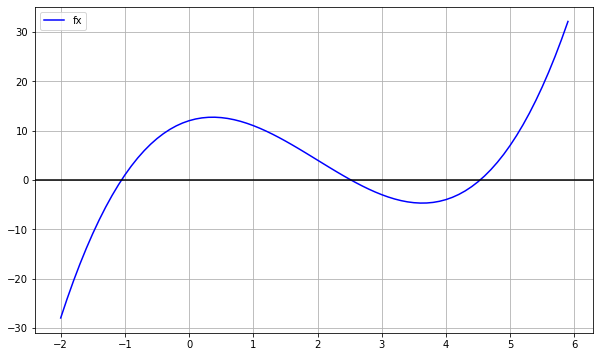

In [6]:
# visualize fx and dfx
fig = plt.figure(figsize = (10,6))
x = np.arange(-2,6,0.1)
y = f1(x)
plt.plot(x, y, c = 'b', label = 'fx')
plt.grid(True, which='both')
plt.axhline(y = 0, color='k')
plt.legend()
plt.show()

In [7]:
eps = 0.005
x1 = -2
x2 = 1
x3 = 2
op = 1
xmax = max_parabolic(x1,x2,x3,eps,op)

x1 = -2.0000	x2 = 1.0000	x3 = 2.0000	x4 = 0.8000
f(x1) = -28.0000	f(x2) = 11.0000	f(x3) = 4.0000	f(x4) = 11.8720
xopt = 0.8000	epa = 25.0000
x1 = -2.0000	x2 = 0.8000	x3 = 1.0000	x4 = 0.5484
f(x1) = -28.0000	f(x2) = 11.8720	f(x3) = 11.0000	f(x4) = 12.5541
xopt = 0.5484	epa = 45.8824
x1 = -2.0000	x2 = 0.5484	x3 = 0.8000	x4 = 0.4704
f(x1) = -28.0000	f(x2) = 12.5541	f(x3) = 11.8720	f(x4) = 12.6580
xopt = 0.4704	epa = 16.5747
x1 = -2.0000	x2 = 0.4704	x3 = 0.5484	x4 = 0.4139
f(x1) = -28.0000	f(x2) = 12.6580	f(x3) = 12.5541	f(x4) = 12.6986
xopt = 0.4139	epa = 13.6429
x1 = -2.0000	x2 = 0.4139	x3 = 0.4704	x4 = 0.3917
f(x1) = -28.0000	f(x2) = 12.6986	f(x3) = 12.6580	f(x4) = 12.7063
xopt = 0.3917	epa = 5.6862
x1 = -2.0000	x2 = 0.3917	x3 = 0.4139	x4 = 0.3787
f(x1) = -28.0000	f(x2) = 12.7063	f(x3) = 12.6986	f(x4) = 12.7086
xopt = 0.3787	epa = 3.4240
x1 = -2.0000	x2 = 0.3787	x3 = 0.3917	x4 = 0.3729
f(x1) = -28.0000	f(x2) = 12.7086	f(x3) = 12.7063	f(x4) = 12.7091
xopt = 0.3729	epa = 1.5459
x1 = -2.00

In [8]:
eps = 0.005
x1 = 2
x2 = 4
x3 = 6
op = 1
xmin = min_parabolic(x1,x2,x3,eps,op)

x1 = 2.0000	x2 = 4.0000	x3 = 6.0000	x4 = 3.3333
f(x1) = 4.0000	f(x2) = -4.0000	f(x3) = 36.0000	f(x4) = -4.2963
xopt = 3.3333	epa = 20.0000 x1 = 2.0000	x2 = 3.3333	x3 = 4.0000	x4 = 3.6000
f(x1) = 4.0000	f(x2) = -4.2963	f(x3) = -4.0000	f(x4) = -4.7040
xopt = 3.6000	epa = 7.4074 x1 = 3.3333	x2 = 3.6000	x3 = 4.0000	x4 = 3.6216
f(x1) = -4.2963	f(x2) = -4.7040	f(x3) = -4.0000	f(x4) = -4.7087
xopt = 3.6216	epa = 0.5970 x1 = 3.6000	x2 = 3.6216	x3 = 4.0000	x4 = 3.6315
f(x1) = -4.7040	f(x2) = -4.7087	f(x3) = -4.0000	f(x4) = -4.7093
xopt = 3.6315	epa = 0.2712 x1 = 3.6216	x2 = 3.6315	x3 = 4.0000	x4 = 3.6325
f(x1) = -4.7087	f(x2) = -4.7093	f(x3) = -4.0000	f(x4) = -4.7093
xopt = 3.6325	epa = 0.0296 x1 = 3.6315	x2 = 3.6325	x3 = 4.0000	x4 = 3.6329
f(x1) = -4.7093	f(x2) = -4.7093	f(x3) = -4.0000	f(x4) = -4.7093
xopt = 3.6329	epa = 0.0105 x1 = 3.6325	x2 = 3.6329	x3 = 4.0000	x4 = 3.6330
f(x1) = -4.7093	f(x2) = -4.7093	f(x3) = -4.0000	f(x4) = -4.7093
xopt = 3.6330	epa = 0.0014 

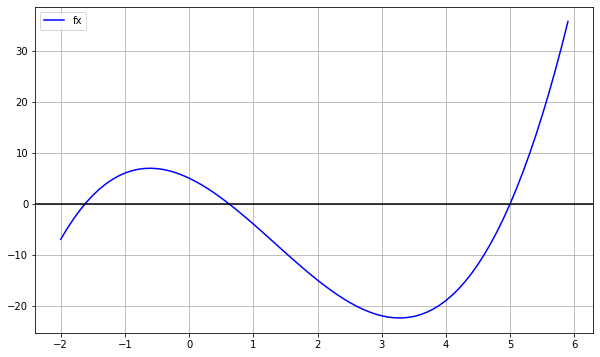

In [9]:
# visualize fx and dfx
fig = plt.figure(figsize = (10,6))
x = np.arange(-2,6,0.1)
y = f2(x)
plt.plot(x, y, c = 'b', label = 'fx')
plt.grid(True, which='both')
plt.axhline(y = 0, color='k')
plt.legend()
plt.show()

In [10]:
eps = 0.005
x1 = -2
x2 = 0
x3 = 2
op = 2
xmax = max_parabolic(x1,x2,x3,eps,op)

x1 = -2.0000	x2 = 0.0000	x3 = 2.0000	x4 = -0.2500
f(x1) = -7.0000	f(x2) = 5.0000	f(x3) = -15.0000	f(x4) = 6.2344
xopt = -0.2500	epa = 100.0000
x1 = -2.0000	x2 = -0.2500	x3 = 0.0000	x4 = -0.5200
f(x1) = -7.0000	f(x2) = 6.2344	f(x3) = 5.0000	f(x4) = 6.8978
xopt = -0.5200	epa = 51.9231
x1 = -2.0000	x2 = -0.5200	x3 = -0.2500	x4 = -0.5665
f(x1) = -7.0000	f(x2) = 6.8978	f(x3) = 6.2344	f(x4) = 6.9335
xopt = -0.5665	epa = 8.2034
x1 = -2.0000	x2 = -0.5665	x3 = -0.5200	x4 = -0.5974
f(x1) = -7.0000	f(x2) = 6.9335	f(x3) = 6.8978	f(x4) = 6.9437
xopt = -0.5974	epa = 5.1841
x1 = -2.0000	x2 = -0.5974	x3 = -0.5665	x4 = -0.6049
f(x1) = -7.0000	f(x2) = 6.9437	f(x3) = 6.9335	f(x4) = 6.9444
xopt = -0.6049	epa = 1.2256
x1 = -2.0000	x2 = -0.6049	x3 = -0.5974	x4 = -0.6086
f(x1) = -7.0000	f(x2) = 6.9444	f(x3) = 6.9437	f(x4) = 6.9446
xopt = -0.6086	epa = 0.6077
x1 = -2.0000	x2 = -0.6086	x3 = -0.6049	x4 = -0.6096
f(x1) = -7.0000	f(x2) = 6.9446	f(x3) = 6.9444	f(x4) = 6.9446
xopt = -0.6096	epa = 0.1753
x1 = -2.000

In [11]:
eps = 0.005
x1 = 2
x2 = 4
x3 = 5
op = 2
xmin = min_parabolic(x1,x2,x3,eps,op)

x1 = 2.0000	x2 = 4.0000	x3 = 5.0000	x4 = 3.1429
f(x1) = -15.0000	f(x2) = -19.0000	f(x3) = 0.0000	f(x4) = -22.3236
xopt = 3.1429	epa = 27.2727 x1 = 2.0000	x2 = 3.1429	x3 = 4.0000	x4 = 3.1944
f(x1) = -15.0000	f(x2) = -22.3236	f(x3) = -19.0000	f(x4) = -22.3869
xopt = 3.1944	epa = 1.6149 x1 = 3.1429	x2 = 3.1944	x3 = 4.0000	x4 = 3.2655
f(x1) = -22.3236	f(x2) = -22.3869	f(x3) = -19.0000	f(x4) = -22.4253
xopt = 3.2655	epa = 2.1759 x1 = 3.1944	x2 = 3.2655	x3 = 4.0000	x4 = 3.2718
f(x1) = -22.3869	f(x2) = -22.4253	f(x3) = -19.0000	f(x4) = -22.4259
xopt = 3.2718	epa = 0.1925 x1 = 3.2655	x2 = 3.2718	x3 = 4.0000	x4 = 3.2761
f(x1) = -22.4253	f(x2) = -22.4259	f(x3) = -19.0000	f(x4) = -22.4261
xopt = 3.2761	epa = 0.1304 x1 = 3.2718	x2 = 3.2761	x3 = 4.0000	x4 = 3.2766
f(x1) = -22.4259	f(x2) = -22.4261	f(x3) = -19.0000	f(x4) = -22.4261
xopt = 3.2766	epa = 0.0177 x1 = 3.2761	x2 = 3.2766	x3 = 4.0000	x4 = 3.2769
f(x1) = -22.4261	f(x2) = -22.4261	f(x3) = -19.0000	f(x4) = -22.4261
xopt = 3.2769	epa = 0.0082 